In [1]:
%pip install matplotlib
%pip install pandas
%pip install seaborn

import gc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from matplotlib.ticker import FuncFormatter

# Suppress the specific DeprecationWarning
warnings.filterwarnings('ignore', category=DeprecationWarning)

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com



[notice] A new release of pip is available: 23.0.1 -> 24.1.2
[notice] To update, run: pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com



[notice] A new release of pip is available: 23.0.1 -> 24.1.2
[notice] To update, run: pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com



[notice] A new release of pip is available: 23.0.1 -> 24.1.2
[notice] To update, run: pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


In [2]:
input_commune_parquet_file_path = '../data/interm/4.0_commune.parquet'

In [3]:
code_insee_identifier = 'Clean code INSEE'
data_df = pd.read_parquet(input_commune_parquet_file_path)

pt_tax_columns = [
    # Taxe Professionnelle - Professional Tax
    'CFE - COMMUNE / PRODUIT REEL NET', # It indicates the actual net revenue from CFE that has been issued to the municipality. It directly reflects the financial inflow from this tax to the commune's budget.
    'CFE - TSE / PRODUIT REEL NET',
    'Part de CVAE au profit de la commune', #  Represents the actual portion of CVAE revenue allocated to the commune. This is a real figure indicating what the commune receives.
    'Part de CVAE dégrevée au profit de la commune', # The amount of CVAE that has been rebated back to the commune, reflecting a real adjustment in the financial records.
    'Part de CVAE exonérée compensée au profit de la commune', # Indicates the amount of CVAE that is exempt but compensated to the commune by other means (possibly state or higher administrative bodies), showing a tangible impact on the commune's finances. 
]
    
all_tax_columns = data_df.columns[8:]
non_pt_tax_columns = [column for column in all_tax_columns if column not in pt_tax_columns]

Professional Tax Revenue Per Year:
1982: 4.7B
1983: 5.0B
1984: 5.8B
1985: 6.4B
1986: 6.9B
1987: 6.2B
1988: 6.6B
1989: 7.0B
1990: 7.8B
1991: 8.6B
1992: 9.4B
1993: 10.0B
1994: 10.6B
1995: 10.9B
1996: 11.2B
1997: 11.6B
1998: 12.0B
1999: 11.6B
2000: 9.5B
2001: 7.6B
2002: 5.8B
2003: 4.7B
2004: 4.3B
2005: 4.2B
2006: 4.1B
2007: 4.2B
2008: 4.3B
2009: 4.5B
2010: 1.6B
2011: 2.9B
2012: 2.9B
2013: 2.7B
2014: 2.4B
2015: 2.5B
2016: 1.3B
2017: 1.0B
2018: 969.8M
2019: 1.6B
2020: 3.2B
2021: 1.5B
2022: 1.5B


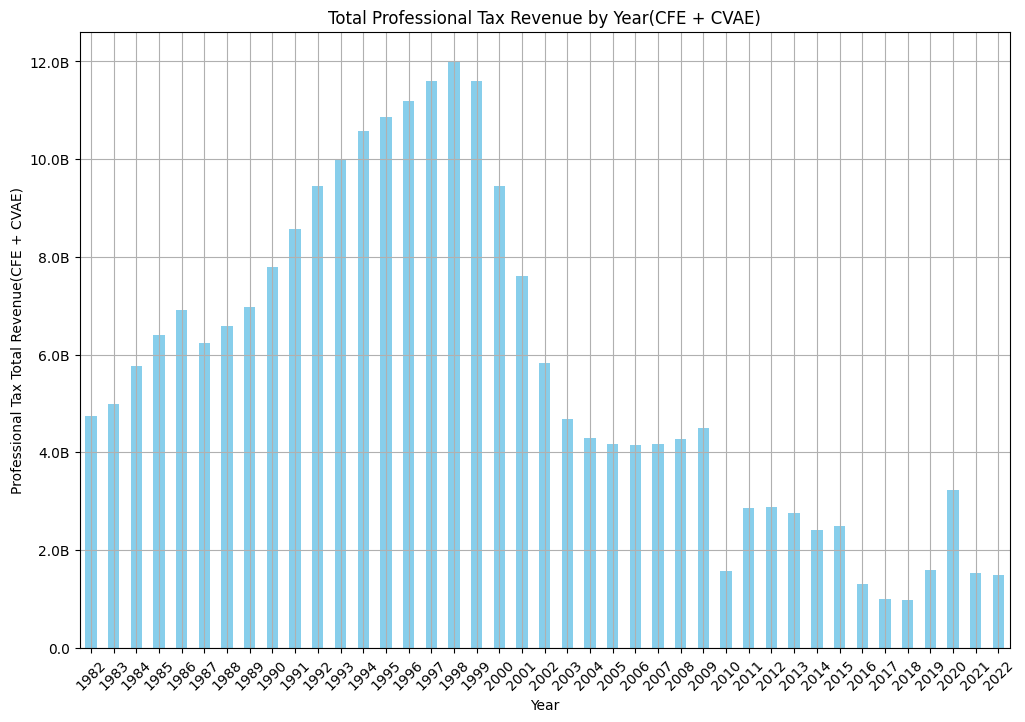

In [4]:
# Define a function to format the y-axis labels to display in millions
def human_readable_format(x, pos=None):
    """
    Converts a number into a human-readable format (K, M, B, T).
    
    Parameters:
    x (float): The number to be converted.
    pos (optional): The position (not used, but required for compatibility with matplotlib).

    Returns:
    str: The human-readable format of the number.
    """
    if x >= 1e12:
        return f'{x / 1e12:.1f}T'
    elif x >= 1e9:
        return f'{x / 1e9:.1f}B'
    elif x >= 1e6:
        return f'{x / 1e6:.1f}M'
    elif x >= 1e3:
        return f'{x / 1e3:.1f}K'
    else:
        return str(x)
    
# Calculate the sum of Professional Tax revenues for each municipality by year
data_df['Total Professional Tax'] = data_df[pt_tax_columns].sum(axis=1)

# Group data by year and sum up the total Professional Tax
total_revenue_by_year = data_df.groupby('ANNEE')['Total Professional Tax'].sum()


print("Professional Tax Revenue Per Year:")
for year, revenue in total_revenue_by_year.items():
    print(f"{year}: {human_readable_format(revenue)}")

# Plotting the aggregated revenue trends across all years
plt.figure(figsize=(12, 8))
total_revenue_by_year.plot(kind='bar', color='skyblue')
plt.title('Total Professional Tax Revenue by Year(CFE + CVAE)')
plt.gca().yaxis.set_major_formatter(FuncFormatter(human_readable_format))  # Apply the formatter
plt.xlabel('Year')
plt.ylabel('Professional Tax Total Revenue(CFE + CVAE)')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


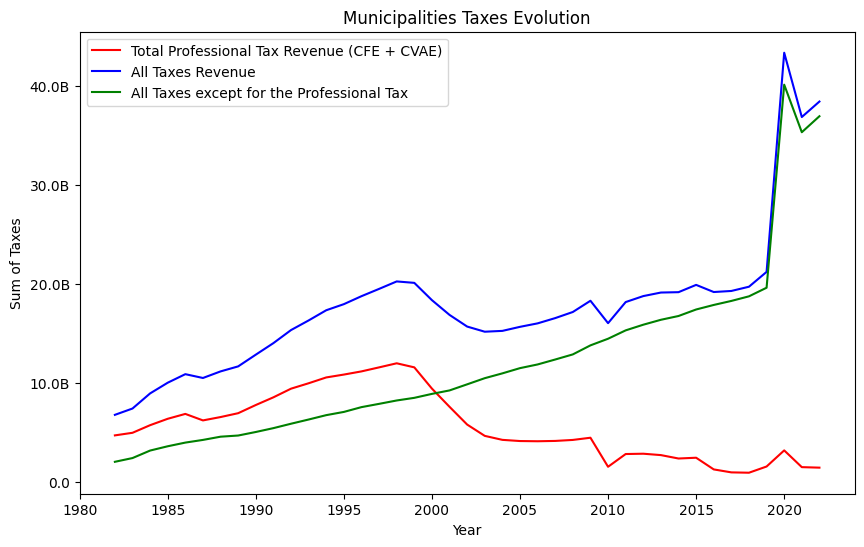

In [5]:
# Group by year and sum the values for each category
annual_sum = data_df.groupby('ANNEE').agg({
    **{col: 'sum' for col in pt_tax_columns},  # Sums for Professional Tax columns
    **{col: 'sum' for col in all_tax_columns},  # Sums for All Tax columns
    **{col: 'sum' for col in non_pt_tax_columns}  # Sums for Non-Professional Tax columns
})

# Calculating the total sums for each category by year
annual_sum['Sum_All_Tax'] = annual_sum[all_tax_columns].sum(axis=1)
annual_sum['Sum_PT_Tax'] = annual_sum[pt_tax_columns].sum(axis=1)
annual_sum['Sum_Non_PT_Tax'] = annual_sum[non_pt_tax_columns].sum(axis=1)

# Plotting each category
plt.figure(figsize=(10, 6))
annual_sum['Sum_PT_Tax'].plot(label='Total Professional Tax Revenue (CFE + CVAE)', color='red')
annual_sum['Sum_All_Tax'].plot(label='All Taxes Revenue', color='blue')
annual_sum['Sum_Non_PT_Tax'].plot(label='All Taxes except for the Professional Tax', color='green')

# Adding labels and legend
plt.xlabel('Year')
plt.ylabel('Sum of Taxes')
plt.gca().yaxis.set_major_formatter(FuncFormatter(human_readable_format))  # Apply the formatter
plt.title('Municipalities Taxes Evolution')
plt.legend()

# Show the plot
plt.show()

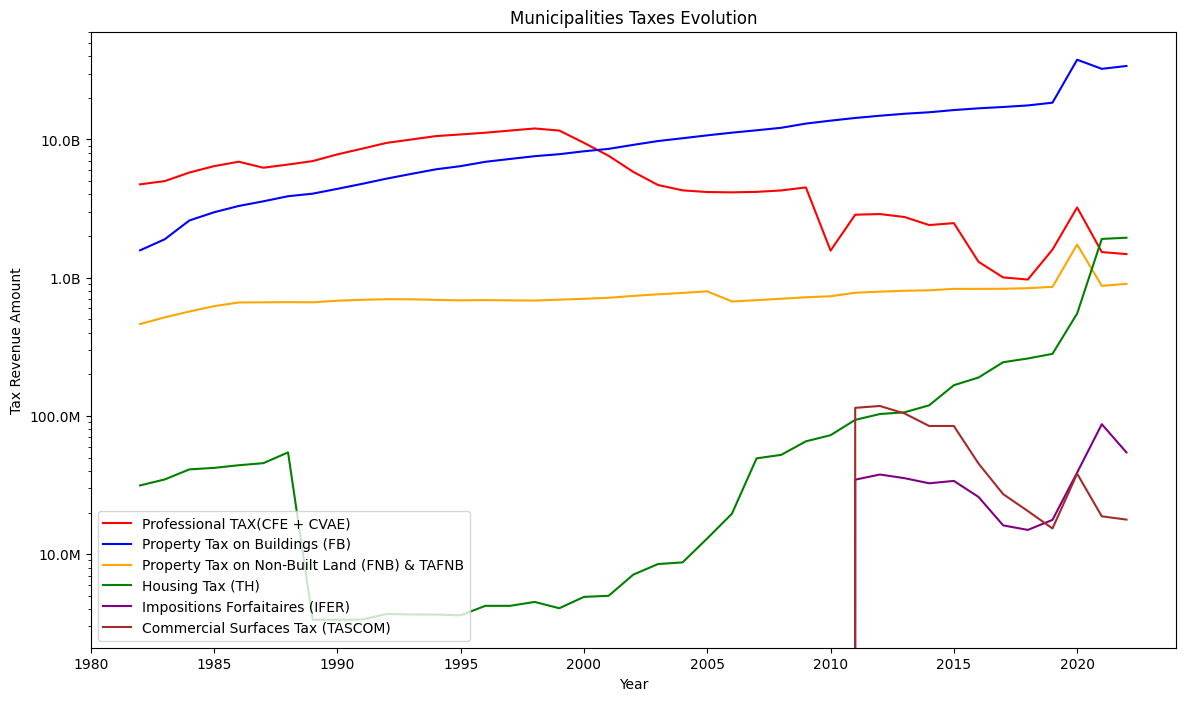

In [6]:
cfe_tax_columns = pt_tax_columns[:1]
cvae_tax_columns = pt_tax_columns[1:]
fb_columns = ['FB - COMMUNE / MONTANT REEL', 'FB - TSE / MONTANT REEL',]
fnb_columns = ['FNB - COMMUNE / MONTANT REEL', 'TAFNB - COMMUNE / MONTANT REEL NET', 'FNB - TSE / MONTANT REEL',]
th_columns = ['TH - COMMUNE / MONTANT REEL COMMUNAL AU PROFIT DE LA COMMUNE', 'TH - TSE / MONTANT REEL', 'TH - MONTANT REEL DE LA MAJORATION DES RESIDENCES SECONDAIRES',]
ifer_columns = ['IFER TOTALE / COMMUNE', 
                'IFER EOLIENNES ART 1519 D DU CGI / COMMUNE / MONTANT',
    'IFER HYDROLIENNES ART 1519 D DU CGI / COMMUNE / MONTANT',
    'IFER CENTRALES NUCLEAIRES OU THERMIQUES A FLAMME ART 1519 E DU CGI / COMMUNE / MONTANT',
    'IFER CENTRALES PHOTOVOLTAIQUES ART 1519 F DU CGI / COMMUNE / MONTANT',
    'IFER BARRAGES HYDRAULIQUES ART 1519 F DU CGI / COMMUNE / MONTANT',
    'IFER TRANSFORMATEURS ELECTRIQUES ART 1519 G DU CGI / COMMUNE / MONTANT',
    'IFER STATIONS RADIOELECTRIQUES ART 1519 H DU CGI / COMMUNE / MONTANT',
    'IFER INSTALLATIONS DE GAZ NATUREL ART 1519HA DU CGI / COMMUNE / MONTANT',
    'IFER GEOTHERMIE (Art 1519 HB) DU CGI / COMMUNE / MONTANT']
tascom_columns = ['TASCOM au profit de la commune']


combined_aggregation = {
    **{col: 'sum' for col in cfe_tax_columns},  # Sums for CFE 
    **{col: 'sum' for col in cvae_tax_columns},  # Sums for CVAE
    **{col: 'sum' for col in pt_tax_columns},  # Sums for CFE  
    **{col: 'sum' for col in fb_columns},  # Sums for property tax on buildings
    **{col: 'sum' for col in fnb_columns},  # Sums for property tax on non-built land
    **{col: 'sum' for col in th_columns},  # Sums for Housing tax
    **{col: 'sum' for col in ifer_columns},  # Sums for Impositions Forfaitaires
    **{col: 'sum' for col in tascom_columns}  # Sums for Commercial Surfaces columns
}

# Group by year and sum the values for each category
yearly_sum = data_df.groupby('ANNEE').agg(combined_aggregation)

# Calculating the total sums for each category by year
yearly_sum['Sum_PT_Tax'] = yearly_sum[pt_tax_columns].sum(axis=1)
yearly_sum['Sum_CFE_Tax'] = yearly_sum[cfe_tax_columns].sum(axis=1)
yearly_sum['Sum_CVAE_Tax'] = yearly_sum[cvae_tax_columns].sum(axis=1)
yearly_sum['Sum_FB_Tax'] = yearly_sum[fb_columns].sum(axis=1)
yearly_sum['Sum_FNB_Tax'] = yearly_sum[fnb_columns].sum(axis=1)
yearly_sum['Sum_TH_Tax'] = yearly_sum[th_columns].sum(axis=1)
yearly_sum['Sum_IFER_Tax'] = yearly_sum[ifer_columns].sum(axis=1)
yearly_sum['Sum_TASCOM_Tax'] = yearly_sum[tascom_columns].sum(axis=1)

# Plotting each category
plt.figure(figsize=(14, 8))
yearly_sum['Sum_PT_Tax'].plot(label='Professional TAX(CFE + CVAE)', color='red')
yearly_sum['Sum_FB_Tax'].plot(label='Property Tax on Buildings (FB)', color='blue')
yearly_sum['Sum_FNB_Tax'].plot(label='Property Tax on Non-Built Land (FNB) & TAFNB', color='orange')
yearly_sum['Sum_TH_Tax'].plot(label='Housing Tax (TH)', color='green')
yearly_sum['Sum_IFER_Tax'].plot(label='Impositions Forfaitaires (IFER)', color='purple')
yearly_sum['Sum_TASCOM_Tax'].plot(label='Commercial Surfaces Tax (TASCOM)', color='brown')

# Adding labels and legend
plt.xlabel('Year')
plt.ylabel('Tax Revenue Amount')
plt.yscale('log') 
plt.gca().yaxis.set_major_formatter(FuncFormatter(human_readable_format))  # Apply the formatter
plt.title('Municipalities Taxes Evolution')
plt.legend()

# Show the plot
plt.show()

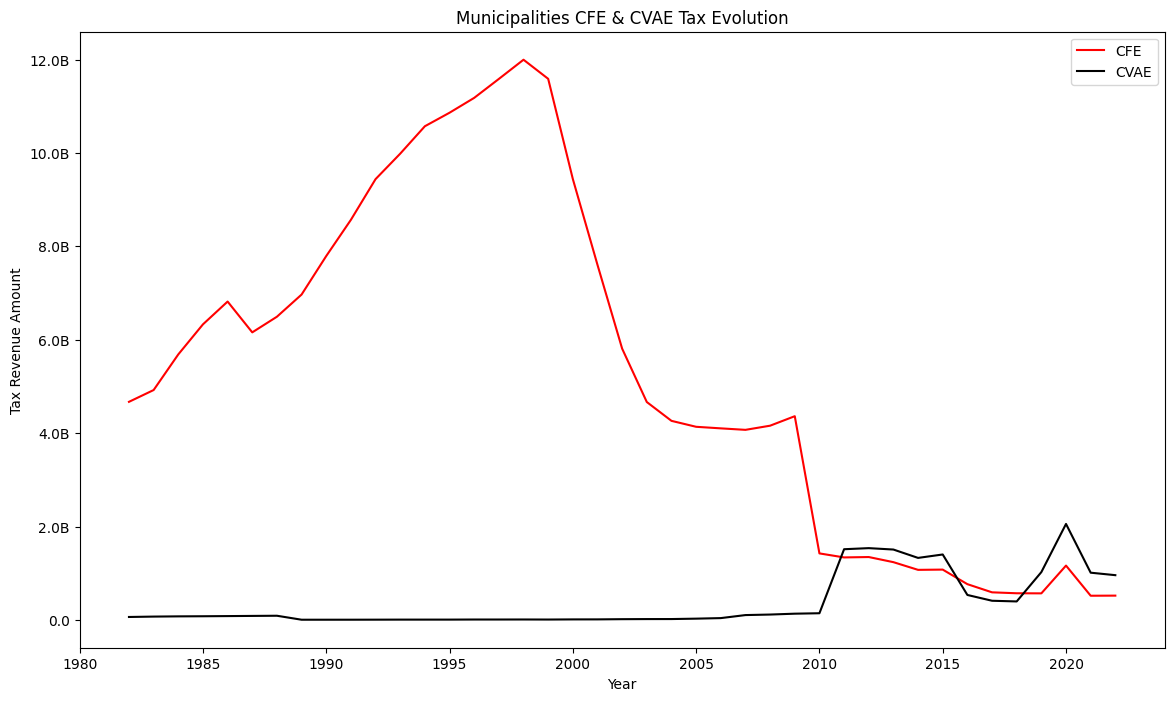

In [7]:
plt.figure(figsize=(14, 8))
yearly_sum['Sum_CFE_Tax'].plot(label='CFE', color='red')
yearly_sum['Sum_CVAE_Tax'].plot(label='CVAE', color='black')


# Adding labels and legend
plt.xlabel('Year')
plt.ylabel('Tax Revenue Amount')
plt.gca().yaxis.set_major_formatter(FuncFormatter(human_readable_format))  # Apply the formatter
plt.title('Municipalities CFE & CVAE Tax Evolution')
plt.legend()

# Show the plot
plt.show()